# Dist analysis

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [2]:
import pandas as pd

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import get_dispersal_kernel, trait_vec
from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture
from poly2.simulator import SimulatorOneTrait

In [3]:
df = pd.read_csv('../outputs/combined/fung_scan.csv')

In [4]:
df.head()

,year,n_pos_diff,mu,b
0,1,9,1.534736,14.303787
1,2,9,1.534736,14.303787
2,3,9,1.534736,14.303787
3,4,9,1.534736,14.303787
4,5,9,1.534736,14.303787


In [12]:
noise = np.random.normal(0, 0.05, size=len(df.n_pos_diff))

all_diffs = (
    df
    .assign(n_pos_diff = lambda x: x.n_pos_diff + noise)
)

is_mono = (
    df
    .assign(n_pos_diff = lambda x: (x.n_pos_diff==9).astype(int) + noise)
)

Text(0, 0.5, 'is monotonic?')

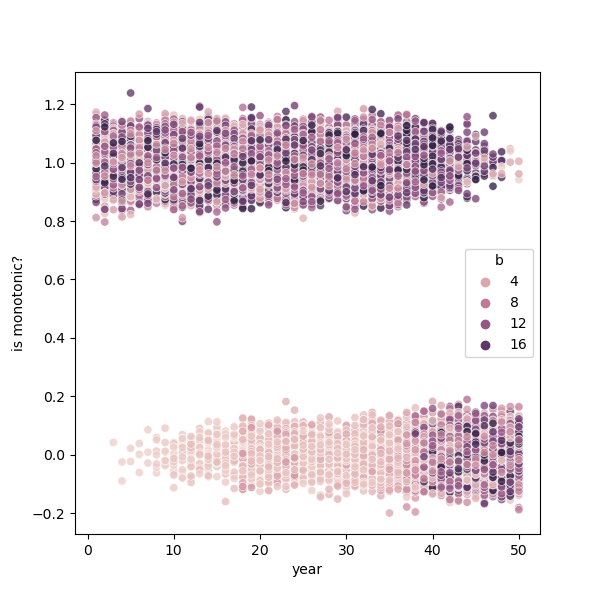

In [17]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    # hue='mu',
    # size='b',
    hue='b',
    data=is_mono,
    ax=ax,
    alpha=0.8,
)

ax.set_ylabel('is monotonic?')

Text(0, 0.5, 'N positive diffs (yield dose i+1 > dose i)')

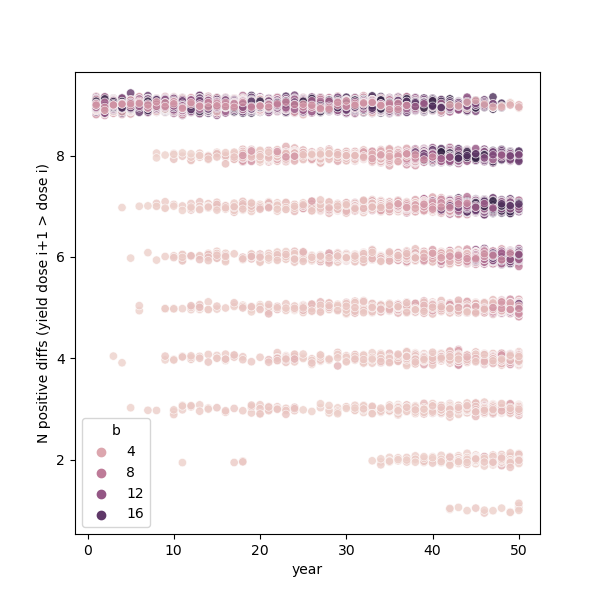

In [16]:
f, ax = plt.subplots(figsize=(6,6))

sns.scatterplot(
    x='year',
    y='n_pos_diff',
    # hue='mu',
    # size='b',
    hue='b',
    data=all_diffs,
    ax=ax,
    alpha=0.8,
)

ax.set_ylabel('N positive diffs (yield dose i+1 > dose i)')

So it looks like they all start off as monotonic increasing in dose. 

Larger values of `b` take longer to become non-monotonic.

Seemingly all are heading that way so that after an intermediate amount of time low doses best.

In [18]:
np.random.

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

In [19]:
from scipy.stats import loguniform

In [55]:
x=loguniform.rvs(1e-1, 10, size=10000)

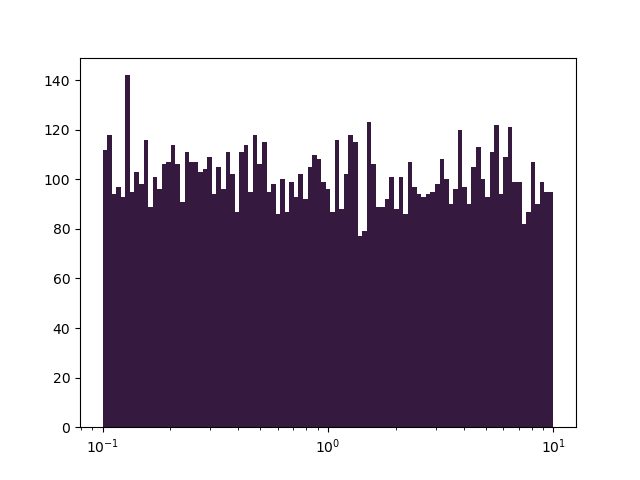

In [56]:
f, ax = plt.subplots()

# ax.scatter(np.arange(len(x)), x, alpha=0.5)

# ax.set_yscale('log')

ax.hist(x, bins=np.logspace(-1,1,100))

ax.set_xscale('log')